In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Combined_Data = pd.read_csv("Resources/Cleaned CSVs/Combined_Data.csv")

Combined_Data.drop('Tm', axis=1, inplace=True)
# Combined_Data.set_index('Tm', inplace=True)

In [3]:
corr_data = Combined_Data.corr()['playoffs']

low_corr_df = pd.DataFrame(corr_data.loc[(corr_data <= 0.11) & (corr_data >= -0.11)])
low_corr_df.rename(columns={'playoffs': 'correlation'}, inplace=True)

index_values = low_corr_df.index.tolist()

index_values

['3B', 'BK', 'CG_y', 'Ch', 'GF', 'HBP_x', 'SB', 'cSho']

In [4]:
columns_to_keep = ['3B', 'BK', 'CG_y', 'Ch', 'GF', 'HBP_x', 'SB', 'cSho', 'playoffs']

focused_df = Combined_Data[columns_to_keep]

focused_df

,3B,BK,CG_y,Ch,GF,HBP_x,SB,cSho,playoffs
0,50.0,5.0,2.0,6150.0,160.0,52.0,79.0,1.0,0
1,29.0,8.0,2.0,5889.0,160.0,66.0,90.0,1.0,1
2,15.0,8.0,2.0,5934.0,160.0,57.0,81.0,0.0,0
3,31.0,3.0,2.0,5819.0,160.0,55.0,125.0,0.0,1
4,34.0,3.0,1.0,6208.0,162.0,78.0,66.0,0.0,1
...,...,...,...,...,...,...,...,...,...
145,12.0,7.0,0.0,5944.0,162.0,70.0,101.0,0.0,0
146,24.0,1.0,0.0,5802.0,162.0,95.0,160.0,0.0,1
147,18.0,4.0,3.0,5789.0,159.0,53.0,79.0,1.0,1
148,19.0,12.0,1.0,5733.0,161.0,69.0,99.0,1.0,1


In [5]:
# Define features set
X = focused_df.copy()
X.drop("playoffs", axis=1, inplace=True)
X

,3B,BK,CG_y,Ch,GF,HBP_x,SB,cSho
0,50.0,5.0,2.0,6150.0,160.0,52.0,79.0,1.0
1,29.0,8.0,2.0,5889.0,160.0,66.0,90.0,1.0
2,15.0,8.0,2.0,5934.0,160.0,57.0,81.0,0.0
3,31.0,3.0,2.0,5819.0,160.0,55.0,125.0,0.0
4,34.0,3.0,1.0,6208.0,162.0,78.0,66.0,0.0
...,...,...,...,...,...,...,...,...
145,12.0,7.0,0.0,5944.0,162.0,70.0,101.0,0.0
146,24.0,1.0,0.0,5802.0,162.0,95.0,160.0,0.0
147,18.0,4.0,3.0,5789.0,159.0,53.0,79.0,1.0
148,19.0,12.0,1.0,5733.0,161.0,69.0,99.0,1.0


In [6]:
# Define target vector
y = Combined_Data["playoffs"].ravel()
y[:5]

array([0, 1, 0, 1, 1])

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,25,1
Actual 1,8,4


Accuracy Score : 0.7631578947368421
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        26
           1       0.80      0.33      0.47        12

    accuracy                           0.76        38
   macro avg       0.78      0.65      0.66        38
weighted avg       0.77      0.76      0.73        38



## Feature Importance

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
feature_importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

feature_importances

[(0.19558891167113393, 'Ch'),
 (0.17122025397720061, 'SB'),
 (0.16882635343710517, 'HBP_x'),
 (0.152698238407673, '3B'),
 (0.11374139059754435, 'BK'),
 (0.08252742268640575, 'GF'),
 (0.06073688156157428, 'CG_y'),
 (0.05466054766136289, 'cSho')]

In [17]:
feature_importances_df= pd.DataFrame(feature_importances)

feature_importances_df.rename(columns={0: 'importance%'}, inplace=True)
feature_importances_df.rename(columns={1: 'stat'}, inplace=True)

feature_importances_df.set_index('stat', inplace=True)

feature_importances_df

,importance%
stat,
Ch,0.195589
SB,0.171220
HBP_x,0.168826
3B,0.152698
BK,0.113741
GF,0.082527
CG_y,0.060737
cSho,0.054661


<Axes: title={'center': 'Most Important Stats'}>

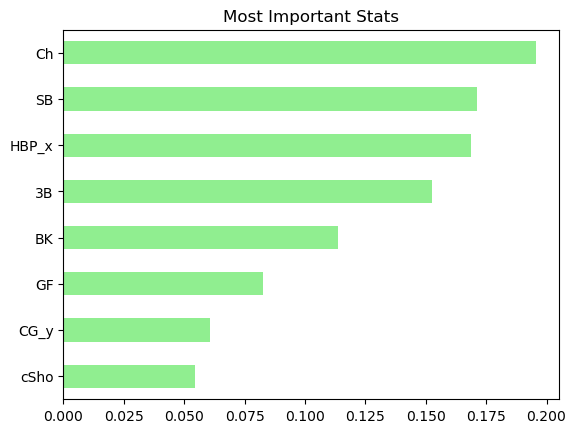

In [18]:
# Visualize the features by importance

importances_sorted = feature_importances_df.sort_values(by='importance%')

importances_sorted.plot(kind='barh', color='lightgreen', title= 'Most Important Stats', ylabel='', legend=False)